# **Latar Belakang dan Identifikasi Masalah**  
  
  TransJakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 287 halte yang tersebar dalam 13 koridor.

  TransJakarta yang awalnya beroperasi mulai jam 05.00 –  22.00 WIB, kini beroperasi 24 jam. Hal tersebut berkenaan dengan semakin tingginya minat masyarakat untuk menggunakan moda transportasi TransJakarta. Data Badan Pusat Statistik (BPS) menyebutkan sepanjang Januari 2024, jumlah penumpang Transjakarta mencapai 30.934.491 orang. Angka ini meningkat 6,83% dibandingkan Desember 2023 dan mengalami peningkatan 4,66% dibandingkan Januari 2023 (Jakarta.bps.go.id).

  Minat masyarakat untuk menggunakan transportasi TransJakarta dikarenakan tarif yang relatif murah jika dibandingkan dengan beberapa pilihan moda transportasi lainnya seperti MRT, LRT serta moda transportasi berbasis online. Namun, sejak beroperasional pada tahun 2004, banyak kekurangan dalam sistem pelayanan TransJakarta, seperti kurangnya armada untuk menampung penumpang yang menyebabkan over capacity serta masih terdapat koridor yang belum steril dari kendaraan pribadi yang menyebakan waktu perjalanan tidak optimal.
  

# **Tujuan Analisa Data**  
1. Mengetahui waktu terpadat (peak hour) pada moda transportasi TransJakarta
2. Mengetahui lokasi terpadat asal dan tujuan berdasarkan data Tap-In dan Tap-Out pengguna TransJakarta
3. Mengetahui koridor terpadat dari pengguna TransJakarta
4. Merekomendasikan beberapa saran yang dapat menjadi pertimbangan oleh TransJakarta dalam meningkatkan kualitas layanan berdasarkan data transaksi pengguna serta penambahan armada TransJakarta


# **Importing Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# **Dataset**

Dataset bersumber dari kaggle dan dapat diunduh pada Link : https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction?select=dfTransjakarta.csv.  
|No. | Nama Kolom | Keterangan |
|----|------------|------------|
|1.	|transID| Unique transaction id for every transaction|
|2.	|payCardID| Customers main identifier. The card customers use as a ticket for entrance and exit.|
|3.	|payCardBank| Customers card bank issuer name|
|4.	|payCardName| Customers name that is embedded in the card.|
|5.	|payCardSex| Customers sex that is embedded in the card|
|6.	|payCardBirthDate| Customers birth year|
|7.	|corridorID| Corridor ID / Route ID as key for route grouping.|
|8.	|corridorName| Corridor Name / Route Name contains Start and Finish for each route.|
|9.	|direction| 0 for Go, 1 for Back. Direction of the route.|
|10.|tapInStops| Tap In (entrance) Stops ID for identifying stops name|
|11.|tapInStopsName| Tap In (entrance) Stops Name where customers tap in.|
|12.|tapInStopsLat| Latitude of Tap In Stops|
|13.|tapInStopsLon| Longitude of Tap In Stops|
|14.|stopStartSeq| Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.|
|15.|tapInTime| Time of tap in. Date and time|
|16.|tapOutStops| Tap Out (Exit) Stops ID for identifying stops name|
|17.|tapOutStopsName| Tap out (exit) Stops Name where customers tap out.|
|18.|tapOutStopsLat| Latitude of Tap Out Stops|
|19.|tapOutStopsLon| Longitude of Tap Out Stops|
|20.|stopEndSeq| Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.|
|21.|tapOutTime| Time of tap out. Date and time|
|22.|payAmount| The number of what customers pay. Some are free. Some not.|

In [4]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# **Informasi Dataset**

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [6]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [7]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(37900, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37900,"[BCGS154L0P82IC, NKFG877O6L24RH]"
1,payCardID,int64,0,2000,"[3577841063274066, 4389022563393310]"
2,payCardBank,object,0,6,"[bni, brizzi]"
3,payCardName,object,0,1993,"[Tgk. Ami Mustofa, Drajat Halimah]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,67,"[1973, 1977]"
6,corridorID,object,1257,221,"[nan, JAK.31]"
7,corridorName,object,1930,216,"[Lebak Bulus - Petukangan, Kalideres - Gelora ..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,1213,2570,"[B01468P, B06767P]"


# **Data Preparation**

**1. Mengecek Data Duplikat**

In [8]:
df.duplicated().sum()

0

**2. Menghitung Missing Values**

In [11]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

**3. Menghitung Persentase Missing Values**


In [10]:
pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns=['null_pct']).query('null_pct>0')

,null_pct
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


# **Data Cleaning**

In [12]:
display(df[df['tapOutStops'].isna()]['transID'].value_counts())

transID
HEMW326B9N91TV    1
NXYW144H9E11EX    1
LWQD332E1J99RO    1
MNVV736G9G32KR    1
AILF366F8H08EM    1
                 ..
JFIU831O9V23XL    1
DEBX633J7P97IS    1
PNKN962S6V21EH    1
FCVW073J9X28TO    1
FSZU331F3O29PS    1
Name: count, Length: 2289, dtype: int64

In [13]:
display(df[df['tapOutStops'].isna()]['tapInStopsName'].value_counts())

tapInStopsName
Penjaringan                   19
BKN                           15
Cibubur Junction              12
Rusun Kapuk Muara             12
Museum Fatahillah             11
                              ..
Pengadegan Barat VII           1
Situ Gintung 2                 1
Jln. Petojo Barat V            1
Masjid Al Mukarromah Lagoa     1
Jln. Pancoran Timur III        1
Name: count, Length: 1094, dtype: int64

In [14]:
display(df[df['tapOutStops'].isna()]['tapInTime'].value_counts())

tapInTime
2023-04-10 06:57:02    2
2023-04-20 06:03:24    2
2023-04-28 07:27:50    2
2023-04-12 17:01:46    2
2023-04-14 17:08:39    2
                      ..
2023-04-03 06:54:59    1
2023-04-03 08:35:00    1
2023-04-03 07:28:29    1
2023-04-03 06:37:37    1
2023-04-30 07:22:58    1
Name: count, Length: 2282, dtype: int64

In [15]:
display(df[df['corridorName'].isna()]['transID'].value_counts())

transID
XTKE052E5E87LN    1
ZTGD644C2P90TD    1
WXQZ784U0R15HW    1
QJJY263X9J46SC    1
YXPC392M0Q97QZ    1
                 ..
JBES122I2B23CM    1
OLIL622O7R57AS    1
GSCT496O5I71TC    1
IEVT944V6R34UG    1
KUXY021D6I25YN    1
Name: count, Length: 1930, dtype: int64

In [16]:
display(df[df['corridorName'].isna()]['tapInStopsName'].value_counts())

tapInStopsName
Garuda Taman Mini                 12
Jln. Taman Jatibaru Timur         10
Bendungan Hilir                   10
Penjaringan                        9
Cawang UKI                         9
                                  ..
SDN Cengkareng Timur 05            1
Gunung Sahari Mangga Dua Timur     1
Masjid Al Waqof                    1
Giant Pondok Gede 1                1
Sekolah Al Huda 1                  1
Name: count, Length: 996, dtype: int64

In [17]:
display(df[df['corridorName'].isna()]['tapInTime'].value_counts())

tapInTime
2023-04-24 06:49:57    2
2023-04-18 19:28:46    2
2023-04-27 06:41:30    2
2023-04-03 06:44:24    1
2023-04-20 06:38:58    1
                      ..
2023-04-03 08:12:39    1
2023-04-03 07:19:30    1
2023-04-03 09:23:07    1
2023-04-03 06:06:26    1
2023-04-08 10:46:06    1
Name: count, Length: 1927, dtype: int64

Seperti yang ditunjukkan dalam beberapa fungsi di atas, missing value yang ada dalam kolom 'corridorName' dan 'tapOutStops' tersebar ke beberapa kategori values dan tidak berada dalam satu kategori saja (misal hanya berada di transID atau tapInTime saja)  sehingga dapat diasumsikan apabila data dihapus maka analisa data tidak terpengaruh, selain juga karena missing value hanya berjumlah 5-6%. Oleh karena itu, kita akan menghapus missing values dengan cara berikut ini.

In [18]:
df = df.dropna(axis=0)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           31730 non-null  object 
 1   payCardID         31730 non-null  int64  
 2   payCardBank       31730 non-null  object 
 3   payCardName       31730 non-null  object 
 4   payCardSex        31730 non-null  object 
 5   payCardBirthDate  31730 non-null  int64  
 6   corridorID        31730 non-null  object 
 7   corridorName      31730 non-null  object 
 8   direction         31730 non-null  float64
 9   tapInStops        31730 non-null  object 
 10  tapInStopsName    31730 non-null  object 
 11  tapInStopsLat     31730 non-null  float64
 12  tapInStopsLon     31730 non-null  float64
 13  stopStartSeq      31730 non-null  int64  
 14  tapInTime         31730 non-null  object 
 15  tapOutStops       31730 non-null  object 
 16  tapOutStopsName   31730 non-null  object 
 17

Setelah dilakukan data cleaning, terlihat bahwa total baris yang ada berkurang dari 37900 baris menjadi 31730. Disaat melakukan pengecekan pada dataset, terlihat data type pada tapInTime dan tapOutTime yang masih berupa object, dimana seharusnya data type pada waktu itu adalah datetime. Oleh karena itu, akan dirubah dtype tersebut menjadi datetime secara manual. 

In [20]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           31730 non-null  object        
 1   payCardID         31730 non-null  int64         
 2   payCardBank       31730 non-null  object        
 3   payCardName       31730 non-null  object        
 4   payCardSex        31730 non-null  object        
 5   payCardBirthDate  31730 non-null  int64         
 6   corridorID        31730 non-null  object        
 7   corridorName      31730 non-null  object        
 8   direction         31730 non-null  float64       
 9   tapInStops        31730 non-null  object        
 10  tapInStopsName    31730 non-null  object        
 11  tapInStopsLat     31730 non-null  float64       
 12  tapInStopsLon     31730 non-null  float64       
 13  stopStartSeq      31730 non-null  int64         
 14  tapInTime         31730 non

In [22]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(31730, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,31730,"[SCEY940Y0A70WV, WZCI695P2A11DO]"
1,payCardID,int64,0,1924,"[30007077737525, 30173960301876]"
2,payCardBank,object,0,6,"[online, emoney]"
3,payCardName,object,0,1917,"[Carla Gunawan, R.A. Chelsea Maryati, M.Ak]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1983, 1955]"
6,corridorID,object,0,216,"[JAK.33, JAK.72]"
7,corridorName,object,0,211,"[Bintaro - Blok M, Kampung Rambutan - Tanjung ..."
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2429,"[B02887P, B04344P]"


# **Analisa Statistika Deskriptif**

**1. Pengukuran Tendency Sentral**
Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal  
  
  Dengan fungsi df.describe langsung dapat diketahui mean, dan median(50%) dari data tersebut

In [33]:
df.describe().T[['mean', '50%']]

,mean,50%
payCardID,420648335773563008.0,3507250769984157.0
payCardBirthDate,1990.210337,1991.0
direction,0.500504,1.0
tapInStopsLat,-6.214794,-6.214145
tapInStopsLon,106.841787,106.8352
stopStartSeq,13.609991,10.0
tapInTime,2023-04-16 07:59:29.082635008,2023-04-16 17:40:38.500000
tapOutStopsLat,-6.214697,-6.214459
tapOutStopsLon,106.841563,106.834892
stopEndSeq,21.301261,18.0


Untuk modus dapat diketahui dari berikut:

In [35]:
modus_BirthDate = df['payCardBirthDate'].mode()[0]
modus_direction =df['direction'].mode()[0]
modus_stopStartSeq =df['stopStartSeq'].mode()[0]
modus_payAmount =df['payAmount'].mode()[0]
print('Besarnya modus dari data')
print('-'*50)
print('modus_BirthDate :', modus_BirthDate)
print('modus_direction :', modus_direction)
print('modus_stopStartSeq:', modus_stopStartSeq)
print('modus_payAmount:', modus_payAmount)

Besarnya modus dari data
--------------------------------------------------
modus_BirthDate : 1992
modus_direction : 1.0
modus_stopStartSeq: 0
modus_payAmount: 3500.0


**2. Pengukuran Variabilitas**  
Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal.  
  
  Untuk range data dapat diketahui sebagai berikut:

In [37]:
range_BirthDate = df['payCardBirthDate'].max()-df['payCardBirthDate'].min()
range_direction =df['direction'].max()-df['direction'].min()
range_stopStartSeq =df['stopStartSeq'].max()-df['stopStartSeq'].min()
range_payAmount =df['payAmount'].max()-df['payAmount'].min()
print('Besarnya range dari data')
print('-'*50)
print('range_BirthDate :', range_BirthDate)
print('range_direction :', range_direction)
print('range_stopStartSeq:', range_stopStartSeq)
print('range_payAmount:', range_payAmount)

Besarnya range dari data
--------------------------------------------------
range_BirthDate : 66
range_direction : 1.0
range_stopStartSeq: 68
range_payAmount: 20000.0


Dengan fungsi df.describe langsung dapat diketahui standar deviasinya sebagai berikut:

In [38]:
df.describe().T[['std']]

,std
payCardID,1316423841084310016.0
payCardBirthDate,13.049288
direction,0.500008
tapInStopsLat,0.058456
tapInStopsLon,0.061086
stopStartSeq,12.267099
tapInTime,NaN
tapOutStopsLat,0.059616
tapOutStopsLon,0.061802
stopEndSeq,13.891748


Untuk IQR DataFrame dapat diketahui dengan cara berikut:

In [39]:
IQR_BirthDate = df.describe()['payCardBirthDate']['75%']-df.describe()['payCardBirthDate']['25%']
IQR_direction =df.describe()['direction']['75%']-df.describe()['direction']['25%']
IQR_stopStartSeq =df.describe()['stopStartSeq']['75%']-df.describe()['stopStartSeq']['25%']
IQR_payAmount =df.describe()['payAmount']['75%']-df.describe()['payAmount']['25%']
print('Besarnya IQR dari data')
print('-'*50)
print('IQR_BirthDate :', IQR_BirthDate)
print('IQR_direction :', IQR_direction)
print('IQR_stopStartSeq:', IQR_stopStartSeq)
print('IQR_payAmount:', IQR_payAmount)

Besarnya IQR dari data
--------------------------------------------------
IQR_BirthDate : 19.0
IQR_direction : 1.0
IQR_stopStartSeq: 15.0
IQR_payAmount: 3500.0


# **Analisa Statistika Deskriptif untuk Data Kategorikal**  
  
  Dilakukan untuk mengetahui count,unique,top, dan freq dari data

In [40]:
df.describe(include='O')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName
count,31730,31730,31730,31730,31730,31730,31730,31730,31730,31730
unique,31730,6,1917,2,216,211,2429,2428,2137,2136
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,1,15702,71,16939,362,362,208,208,274,274


# **Analisa Data**

In [25]:
df_ = df.copy()
df_

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


## **1. Menganalisa Peak Hour TransJakarta**

In [26]:
# Mengekstrak waktu dari tapInTime dan tapOutTime
df_['tapInHour'] = df_['tapInTime'].dt.hour
df_['tapOutHour'] = df_['tapOutTime'].dt.hour
df['weekday'] = df['tapInTime'].dt.weekday

df['travelDuration'] = df['tapOutTime'] - df['tapInTime']
df['travelDuration'] = df['travelDuration'].dt.total_seconds()/60

In [27]:
# Group by tapInHour/tapOutHours dan menghitung jumlah perjalanannya
def tapGroup(data, by: str):
    res = data.groupby(by)['transID'].count()
    return res


In [29]:
# Menggabungkan tapInHour dan tapOutHour
def combineTap(fn1, fn2):
    hour_counts = fn1.add(fn2, fill_value=0)
    return hour_counts
count_hours = combineTap(tapGroup(df_, 'tapInHour'), tapGroup(df_, 'tapOutHour'))

In [30]:
# Membuat Bar Plot
def peakBar(data):
    sns.barplot(x=data.index, y=count_hours.values, color='skyblue')
    # Set plot title and labels
    plt.title('Peak Travel Time')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    # Display the plot
    plt.show()

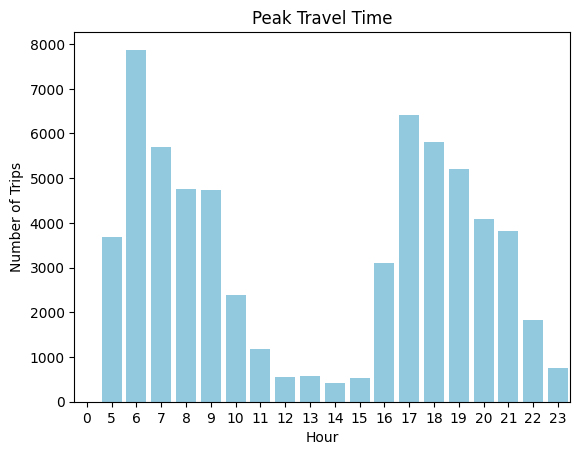

In [32]:
# Melihat barplot yang telah dibuat
peakBar(count_hours)

Berdasarkan barplot tersebut dapat disimpulkan Peak Hour TransJakarta adalah pada pagi hari pukul 06.00 WIB dan sore hari pukul 17.00 WIB. Maka disarankan kepada TransJakarta untuk meningkatkan armada pada jam-jam tersebut dikarenakan kepadatan pengguna akan memuncak pada waktu tersebut.

## **2. Menganalisa jumlah tapIn dan tapOut pada setiap halte TransJakarta**


In [47]:
df.value_counts(['tapOutStopsName', 'tapOutStops']).head(10)

tapOutStopsName         tapOutStops
BKN                     P00016         274
Penjaringan             P00170         236
Term. Senen             B05725P        175
Term. Kampung Rambutan  B05708P        144
Monas                   P00137         140
Ragunan                 P00199         130
Pinang Ranti            P00179         129
Kejaksaan Agung         P00112         123
Jembatan Item           B01745P        117
Cibubur Junction        B00248P        114
Name: count, dtype: int64

[Text(0, 0, 'BKN'),
 Text(1, 0, 'Penjaringan'),
 Text(2, 0, 'Term. Senen'),
 Text(3, 0, 'Term. Kampung Rambutan'),
 Text(4, 0, 'Monas'),
 Text(5, 0, 'Ragunan'),
 Text(6, 0, 'Pinang Ranti'),
 Text(7, 0, 'Kejaksaan Agung'),
 Text(8, 0, 'Jembatan Item'),
 Text(9, 0, 'Cibubur Junction')]

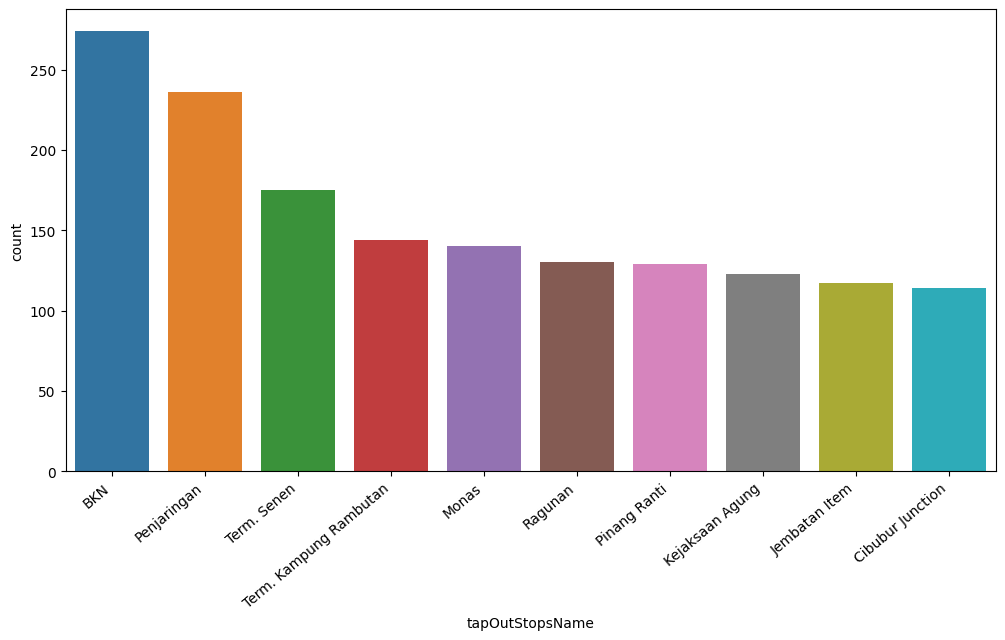

In [64]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df,x='tapOutStopsName', order=df['tapOutStopsName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


In [65]:
df.value_counts(['tapInStopsName', 'tapInStops']).head(10)

tapInStopsName     tapInStops
Penjaringan        P00170        208
Garuda Taman Mini  P00064        180
BKN                P00016        149
BNN LRT            P00297        139
Pejaten            P00164        133
Penggilingan       P00169        118
Seskoal            P00221        112
Cibubur Junction   B00248P       109
Rusun Kapuk Muara  B03277P       108
Rawa Selatan       P00202        102
Name: count, dtype: int64

[Text(0, 0, 'Penjaringan'),
 Text(1, 0, 'Garuda Taman Mini'),
 Text(2, 0, 'BKN'),
 Text(3, 0, 'BNN LRT'),
 Text(4, 0, 'Pejaten'),
 Text(5, 0, 'Penggilingan'),
 Text(6, 0, 'Seskoal'),
 Text(7, 0, 'Cibubur Junction'),
 Text(8, 0, 'Rusun Kapuk Muara'),
 Text(9, 0, 'Rawa Selatan')]

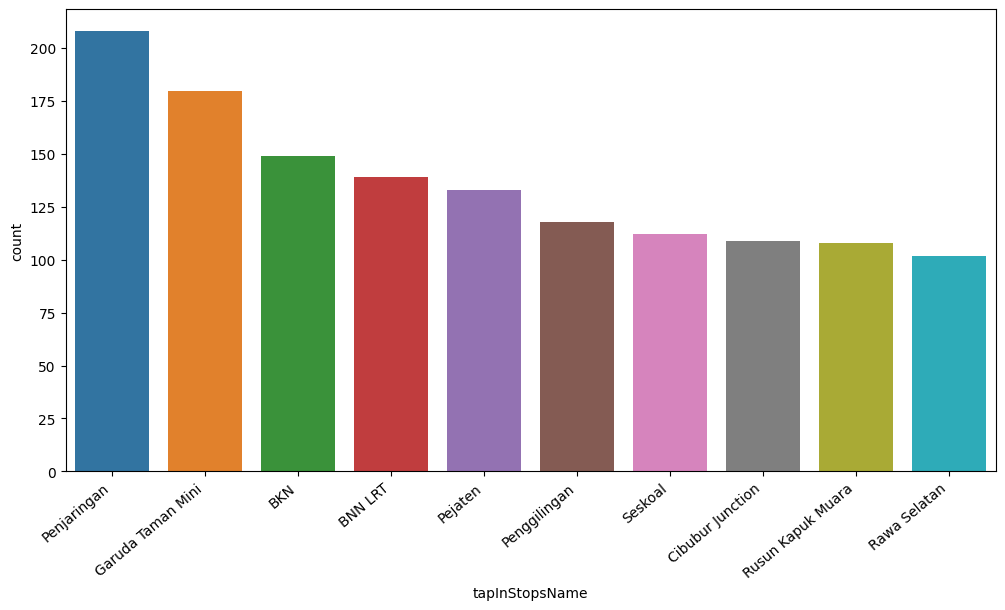

In [66]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df,x='tapInStopsName', order=df['tapInStopsName'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Dapat dilihat dari tabel berikut bahwa tapIn terbanyak adalah pada corridor Penjaringan yaitu sebesar 208 taps dan tapOut terbanyak ada pada BKN sebanyak 274 taps.

## **3. Menganalisa usia pengguna TransJakarta**

In [86]:
df['payCardBirthDate'].value_counts().head(10)

payCardBirthDate
1992    1203
1994    1170
1981    1142
1987    1083
1985    1009
1989     986
1983     984
1996     984
1991     962
1984     945
Name: count, dtype: int64

In [118]:
date_birth = df_.payCardBirthDate
date_birth

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 31730, dtype: int64

In [121]:
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-date_birth
    return age
Age = df_['payCardBirthDate'].apply(calculate_age)
Age
df_.Age=df_

[Text(0, 0, '1992'),
 Text(1, 0, '1994'),
 Text(2, 0, '1981'),
 Text(3, 0, '1987'),
 Text(4, 0, '1985'),
 Text(5, 0, '1989'),
 Text(6, 0, '1983'),
 Text(7, 0, '1996'),
 Text(8, 0, '1991'),
 Text(9, 0, '1984'),
 Text(10, 0, '1986'),
 Text(11, 0, '1982'),
 Text(12, 0, '1993'),
 Text(13, 0, '1988'),
 Text(14, 0, '2004'),
 Text(15, 0, '1990'),
 Text(16, 0, '2003'),
 Text(17, 0, '2002'),
 Text(18, 0, '2007'),
 Text(19, 0, '2012'),
 Text(20, 0, '2008'),
 Text(21, 0, '1997'),
 Text(22, 0, '1995'),
 Text(23, 0, '2009'),
 Text(24, 0, '2010'),
 Text(25, 0, '2011'),
 Text(26, 0, '2006'),
 Text(27, 0, '2000'),
 Text(28, 0, '2005'),
 Text(29, 0, '2001'),
 Text(30, 0, '1998'),
 Text(31, 0, '1975'),
 Text(32, 0, '1999'),
 Text(33, 0, '1977'),
 Text(34, 0, '1974'),
 Text(35, 0, '1966'),
 Text(36, 0, '1976'),
 Text(37, 0, '1965'),
 Text(38, 0, '1978'),
 Text(39, 0, '1979'),
 Text(40, 0, '1970'),
 Text(41, 0, '1973'),
 Text(42, 0, '1980'),
 Text(43, 0, '1967'),
 Text(44, 0, '1968'),
 Text(45, 0, '1969')

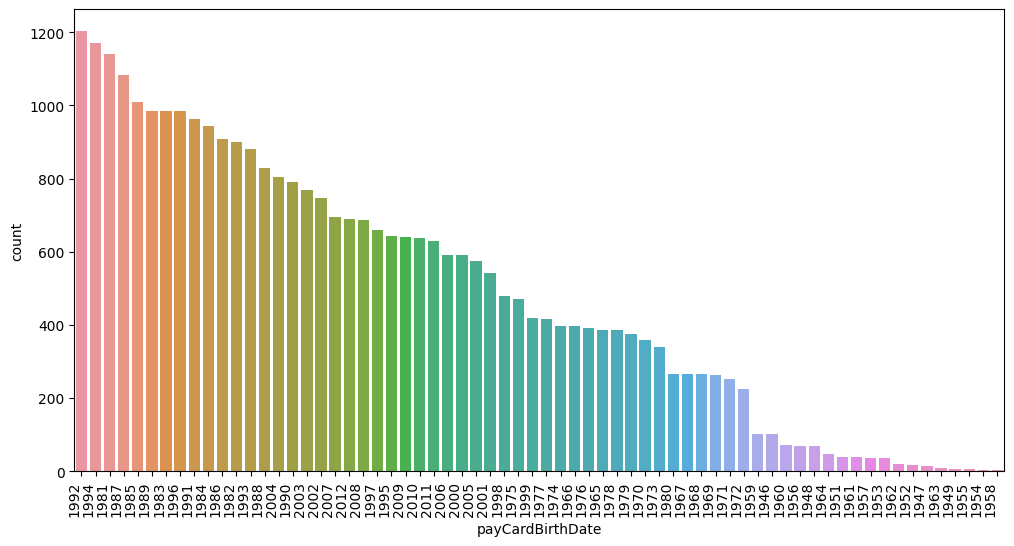

In [135]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df_,x='payCardBirthDate', order=df_['payCardBirthDate'].value_counts().iloc[:100].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

## **4. Menganalisa corridor mana yang memiliki penumpang terbanyak & terdikit**

In [126]:
df['corridorName'].value_counts()

corridorName
Cibubur - Balai Kota                              362
Ciputat - CSW                                     350
Harmoni - Jakarta International Stadium           313
Pulo Gadung - Monas                               311
Kampung Rambutan - Pondok Gede                    305
                                                 ... 
Grogol - Pos Pengumben via Slipi                   37
Senen - Tanah Abang                                36
Term. Pulo Gadung - Lampiri                        28
Tanah Abang - Kebayoran Lama via Pos Pengumben     21
Kampung Rambutan - Blok M                          16
Name: count, Length: 211, dtype: int64

**Corridor Cibubur - Balai Kota**

In [127]:
df_cibubur = df_[df_['corridorName'] == 'Cibubur - Balai Kota']
df_cibubur.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,5,5
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,1.0,B00102P,...,2023-04-03 05:28:11,B00360P,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-03 06:09:57,20000.0,5,6
305,ELVF454E9T40AX,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,1.0,B00325P,...,2023-04-03 16:15:42,B02873P,Plaza Sentral,-6.216247,106.81676,12.0,2023-04-03 17:08:45,20000.0,16,17
370,BXVS080I7X46TX,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,1.0,B05773P,...,2023-04-03 17:54:25,B00325P,Dukuh Atas 3,-6.205650,106.82250,7.0,2023-04-03 19:39:59,20000.0,17,19
434,DXGL440B0R80HB,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,0.0,B00248P,...,2023-04-03 17:49:34,B03314P,MH Thamrin 2,-6.188238,106.82277,12.0,2023-04-03 18:54:24,20000.0,17,18


In [155]:
tapOutTime = df_.tapOutTime
tapInTime = df_.tapInTime
df_cibubur['travel_time'] = (df_cibubur['tapOutTime'] - df_cibubur['tapInTime']).dt.total_seconds() / 60  # in minutes
duration = df_cibubur[['payCardName', 'tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'travel_time']]
duration.sort_values(by='travel_time', ascending=False).head(10)

,payCardName,tapInStopsName,tapOutStopsName,tapInTime,tapOutTime,travel_time
37897,drg. Zahra Nashiruddin,Plaza Sentral,Buperta Cibubur,2023-04-04 10:29:47,2023-04-04 13:27:25,177.633333
18721,"Ratih Nurdiyanti, M.Pd",Plaza Indonesia,Balai Kota 1,2023-04-11 19:37:39,2023-04-11 21:37:26,119.783333
15732,Uli Suartini,MH Thamrin 1,Buperta Cibubur,2023-04-06 18:49:57,2023-04-06 20:49:26,119.483333
31121,Ulya Suartini,Bank Indonesia 2,IRTI,2023-04-28 06:17:24,2023-04-28 08:16:52,119.466667
26721,"Ratih Nurdiyanti, M.Pd",Plaza Indonesia,Balai Kota 1,2023-04-21 20:58:25,2023-04-21 22:57:32,119.116667
2170,"Mustofa Wijayanti, M.Farm",Tosari 1,Dukuh Atas 3,2023-04-06 16:29:09,2023-04-06 18:27:36,118.450000
23002,Fathonah Permadi,St. Sudirman 2,Tosari 2,2023-04-18 08:54:18,2023-04-18 10:52:27,118.150000
24219,Putri Nashiruddin,Wisma Nusantara,Bumiputera,2023-04-19 09:42:49,2023-04-19 11:40:49,118.000000
12448,Jarwa Tampubolon,Benhil 3,St. Sudirman 2,2023-04-03 06:19:20,2023-04-03 08:17:08,117.800000
14948,Jarwa Tampubolon,Bank Indonesia 1,Sari Pan Pacific,2023-04-05 17:21:08,2023-04-05 19:18:48,117.666667


**Corridor Ciputat - CSW**

In [174]:
df_ciputat = df_[df_['corridorName'] == 'Ciputat - CSW']
df_ciputat.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,travel_time
208,RGMW432Q3X94EA,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,0.0,B05904P,...,B00053P,Antena II,-6.250330,106.79163,26.0,2023-04-03 06:57:30,3500.0,6,6,0 days 00:53:30
508,ASQJ814J6M20QW,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,1.0,B05232P,...,B02919P,Pom Bensin Ciputat,-6.321313,106.74627,27.0,2023-04-03 18:39:40,3500.0,17,18,0 days 01:15:55
808,PQGD277L5K97CJ,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,0.0,B05904P,...,B00053P,Antena II,-6.250330,106.79163,26.0,2023-04-04 05:59:02,3500.0,5,5,0 days 00:34:15
1108,AHTM837M1Y76ZB,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,1.0,B05232P,...,B02919P,Pom Bensin Ciputat,-6.321313,106.74627,27.0,2023-04-04 19:10:01,3500.0,17,19,0 days 01:51:09
1708,ONIE997I2V06VZ,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,1.0,B05232P,...,B02919P,Pom Bensin Ciputat,-6.321313,106.74627,27.0,2023-04-05 19:02:33,3500.0,17,19,0 days 01:54:02


In [175]:
tapOutTime = df_.tapOutTime
tapInTime = df_.tapInTime
df_ciputat['travel_time'] = (df_ciputat['tapOutTime'] - df_ciputat['tapInTime']).dt.total_seconds() / 60  # in minutes
duration = df_ciputat[['payCardName', 'tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'travel_time']]
duration.sort_values(by='travel_time', ascending=False).head(10)

,payCardName,tapInStopsName,tapOutStopsName,tapInTime,tapOutTime,travel_time
37705,Hilda Halim,St. MRT Blok M 1,Komplek Uin,2023-04-28 12:45:22,2023-04-28 14:53:48,128.433333
37774,"Luhung Rahmawati, M.Ak",UMJ 1,Dwijaya,2023-04-16 14:17:49,2023-04-16 16:24:03,126.233333
15827,"Tgk. Farhunnisa Pertiwi, S.Farm",Margaguna 1,Dwijaya,2023-04-06 18:56:25,2023-04-06 20:55:44,119.316667
24879,Jais Marpaung,Situ Gintung 2,Polsek Ciputat 2,2023-04-19 19:01:19,2023-04-19 21:00:15,118.933333
13247,"Luthfi Habibi, S.H.",Jln. Pesanggrahan,Pondok Pinang,2023-04-04 08:17:17,2023-04-04 10:15:48,118.516667
28379,Jais Marpaung,Jln. Wr Supratman,Jln. Pahlawan,2023-04-25 07:52:47,2023-04-25 09:51:06,118.316667
22752,Najib Gunawan,Pusdiklat Kemenag 2,Ps. Ciputat,2023-04-17 18:27:23,2023-04-17 20:25:30,118.116667
27752,Najib Gunawan,Pusdiklat Kemenag 2,Ps. Ciputat,2023-04-24 17:07:23,2023-04-24 19:05:27,118.066667
16548,Yuliana Thamrin,Pusdiklat Kemenag 1,Komplek Mandiri Giant Express 1,2023-04-07 21:52:01,2023-04-07 23:49:44,117.716667
26752,Najib Gunawan,Pusdiklat Kemenag 2,Ps. Ciputat,2023-04-21 21:43:04,2023-04-21 23:40:09,117.083333


**Corridor Kampung Rambutan - Blok M**

In [176]:
df_kr = df_[df_['corridorName'] == 'Kampung Rambutan - Blok M']
df_kr.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,travel_time
32159,OTLQ523M9T67TL,4367294005037,online,Dr. Wirda Hardiansyah,M,1982,7B,Kampung Rambutan - Blok M,1.0,B05384P,...,B03148P,RS Jantung Binawaluya,-6.308410,106.87071,46.0,2023-04-09 19:52:39,3500.0,19,19,0 days 00:25:50
32289,KVWK767L9U36JJ,30584868425288,bni,Victoria Susanti,M,1991,7B,Kampung Rambutan - Blok M,0.0,B03167P,...,B03195P,RSIA Duren Tiga 1,-6.253592,106.84130,29.0,2023-04-08 16:38:20,3500.0,14,16,0 days 01:42:41
32373,KYDZ501U8V82GC,676194898042,flazz,Tiara Kurniawan,F,2006,7B,Kampung Rambutan - Blok M,0.0,B05802P,...,P00112,Kejaksaan Agung,-6.240500,106.79844,40.0,2023-04-09 17:42:32,3500.0,16,17,0 days 01:39:22
32434,KDJL674T2W16PY,4543926367520,online,Belinda Mansur,F,1991,7B,Kampung Rambutan - Blok M,0.0,B02849P,...,B05802P,Transvision,-6.240036,106.82842,36.0,2023-04-09 18:20:18,3500.0,17,18,0 days 00:27:58
33002,NXUL264N1J13EA,30102021683402,bni,Cornelia Siregar,M,1992,7B,Kampung Rambutan - Blok M,1.0,B05764P,...,P00060,Flyover Raya Bogor,-6.306500,106.86570,44.0,2023-04-15 10:50:18,3500.0,9,10,0 days 01:22:54


In [183]:
tapOutTime = df_.tapOutTime
tapInTime = df_.tapInTime
df_kr['travel_time'] = (df_kr['tapOutTime'] - df_kr['tapInTime']).dt.total_seconds() / 60  # in minutes
duration = df_kr[['payCardName', 'tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'travel_time']]
duration.sort_values(by='travel_time', ascending=False).head(20)

,payCardName,tapInStopsName,tapOutStopsName,tapInTime,tapOutTime,travel_time
37613,"Drs. Marsudi Safitri, S.Kom",Rawa Barat,Kejaksaan Agung,2023-04-23 09:40:03,2023-04-23 12:16:28,156.416667
33147,"Sutan Mumpuni Saragih, M.M.",Ps. Hek 1,Potlot,2023-04-15 16:04:46,2023-04-15 18:00:55,116.150000
34787,Luwar Hutagalung,St. Duren Kalibata 1,Tanah Merdeka Arah Timur,2023-04-30 09:44:59,2023-04-30 11:40:45,115.766667
34562,Wirda Narpati,RSIA Duren Tiga 2,Sbr. Term. Kampung Rambutan,2023-04-30 13:49:24,2023-04-30 15:36:11,106.783333
32289,Victoria Susanti,RS Polri Jaktim,RSIA Duren Tiga 1,2023-04-08 14:55:39,2023-04-08 16:38:20,102.683333
37658,Faizah Lailasari,Bulak Rantai,Cililitan Kecil,2023-04-01 12:35:29,2023-04-01 14:16:26,100.950000
32373,Tiara Kurniawan,Transvision,Kejaksaan Agung,2023-04-09 16:03:10,2023-04-09 17:42:32,99.366667
33505,Yessi Novitasari,Kejaksaan Agung,Blok M Jalur 2,2023-04-23 17:20:11,2023-04-23 18:49:58,89.783333
33898,Galar Sitompul,St. Duren Kalibata 2,Jln. Mastrip,2023-04-22 20:55:37,2023-04-22 22:24:41,89.066667
34363,Dr. Jamalia Lailasari,RS Pusdikkes,Plaza Kalibata,2023-04-29 05:44:34,2023-04-29 07:08:54,84.333333


**Corridor Tanah Abang - Kebayoran Lama via Pos Pengumben**

In [184]:
df_ta = df_[df_['corridorName'] == 'Tanah Abang - Kebayoran Lama via Pos Pengumben']
df_ta.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,travel_time
32352,CVOC688B9L22GC,6563676663681545,dki,Mala Agustina,M,1961,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,1.0,B04039P,...,P00083,Jak Lingko Tanah Abang,-6.185496,106.81105,56.0,2023-04-08 17:23:01,0.0,15,17,0 days 01:59:28
32489,JKSQ560O1T38VX,180051109225867,emoney,"Hj. Keisha Permata, S.H.",M,1974,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,1.0,B01335P,...,B01306P,Jln. KS Tubun II,-6.191900,106.80579,51.0,2023-04-08 09:56:23,0.0,8,9,0 days 01:23:15
32744,VCNG549Q4N74ZD,213134876567066,emoney,"Drs. Irfan Hakim, M.TI.",M,2002,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,1.0,B05455P,...,B00836P,Jln. Adam Sukabumi Utara,-6.208434,106.78322,34.0,2023-04-15 13:37:49,0.0,13,13,0 days 00:26:27
33114,GOEC413S8W31JX,4642976742436642,dki,"dr. Prasetyo Pertiwi, S.T.",F,1982,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,1.0,B03125P,...,B01787P,JPO Blok G,-6.188861,106.81135,55.0,2023-04-16 09:54:58,0.0,8,9,0 days 01:06:59
34145,UFKR623P3Q20OR,377219934316440,emoney,Nurul Rajata,M,1986,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,0.0,B01093P,...,B00845P,Jln. Al Islamiyah Grogol Selatan,-6.225526,106.77650,51.0,2023-04-29 21:47:07,0.0,20,21,0 days 01:38:57


In [188]:
tapOutTime = df_.tapOutTime
tapInTime = df_.tapInTime
df_ta['travel_time'] = (df_ta['tapOutTime'] - df_ta['tapInTime']).dt.total_seconds() / 60  # in minutes
duration = df_ta[['payCardName', 'tapInStopsName', 'tapOutStopsName', 'tapInTime', 'tapOutTime', 'travel_time']]
duration.sort_values(by='travel_time', ascending=False).head(21)

,payCardName,tapInStopsName,tapOutStopsName,tapInTime,tapOutTime,travel_time
37788,Latif Nainggolan,Komplek Hankam Cidodol,Jln. Pahlawan Sukabumi Selatan,2023-04-14 11:26:35,2023-04-14 13:55:54,149.316667
32352,Mala Agustina,Sbr. Masjid Annur Tanah Abang,Jak Lingko Tanah Abang,2023-04-08 15:23:33,2023-04-08 17:23:01,119.466667
35938,Indah Wibowo,Sbr. TPU Grogol Selatan,Jln. WW Sukabumi Selatan,2023-04-15 15:41:26,2023-04-15 17:39:41,118.250000
37138,Indah Wibowo,Sbr. TPU Grogol Selatan,Jln. WW Sukabumi Selatan,2023-04-18 17:54:37,2023-04-18 19:52:21,117.733333
36738,Indah Wibowo,Sbr. TPU Grogol Selatan,Jln. WW Sukabumi Selatan,2023-04-17 17:41:06,2023-04-17 19:23:57,102.850000
34145,Nurul Rajata,Jln. H. Abdullah,Jln. Al Islamiyah Grogol Selatan,2023-04-29 20:08:10,2023-04-29 21:47:07,98.950000
36138,Indah Wibowo,Simpang Palmerah Barat Rawa Belong,Sbr. Komplek Kemhan Cidodol,2023-04-16 11:34:26,2023-04-16 13:01:35,87.150000
32489,"Hj. Keisha Permata, S.H.",Jln. Madrasah II Sukabumi Selatan,Jln. KS Tubun II,2023-04-08 08:33:08,2023-04-08 09:56:23,83.250000
37338,Indah Wibowo,Simpang Palmerah Barat Rawa Belong,Sbr. Komplek Kemhan Cidodol,2023-04-19 08:25:13,2023-04-19 09:47:44,82.516667
36538,Indah Wibowo,Simpang Palmerah Barat Rawa Belong,Sbr. Komplek Kemhan Cidodol,2023-04-17 09:36:55,2023-04-17 10:56:07,79.200000


In [191]:
df_

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,travel_time
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,0 days 00:39:09
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,0 days 00:57:17
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,0 days 00:51:49
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,0 days 00:43:25
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,0 days 00:39:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,0 days 01:37:12
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,0 days 00:35:51
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,0 days 02:57:38
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20,0 days 00:28:24


# **Kesimpulan Dan Saran**

**Kesimpulan**  
Berdasarkan hasil Analisa Data, dapat disimpulkan bahwa:
* Waktu Peak Hour TransJakarta adalah pada pagi hari pukul 06.00 WIB dan sore hari pukul 17.00 WIB 
* TapIn terbanyak ada pada halte BKN sebanyak 274 taps dan tapOut terbanyak ada pada halte Penjaringan sebanyak 208 taps
* Usia terbanyak pada penggunaan TransJakarta adalah pada tahun kelahiran 1992,1994,1981,1987,1985 (32 Tahun, 30 Tahun, 43 Tahun, 37 Tahun, 39 Tahun)
* Pengguna TransJakarta paling banyak adalah pada koridor Cibubur - Balai Kota sebanyak 362 pengguna. Sedangkan, pengguna TransJakarta paling sedikit adalah pada koridor Kampung Rambutan - Blok M sebanyak 16 pengguna.

**Saran**

* Menambah jumlah perjalanan TransJakarta di jam sibuk untuk menambah income dan juga membuat pengguna tidak terlalu menumpuk agar pengguna merasa nyaman.
* Mengurangi jumlah perjalanan TransJakarta pada waktu siang hari (Pukul 12.00-15.00 WIB) dikarenakan pengguna pada waktu tersebut dapat dilihat sangat sedikit.
* Menambah armada pada daerah BKN dan Penjaringan karena tapIn dan tapOut terbanyak ada pada daerah tersebut.
* Mengurangi armada TransJakarta untuk koridor Kampung Rambutan - Blok M karena memiliki pengguna yang sedikit, pengalokasian TransJakarta bisa untuk Koridor Cibubur - Balai Kota karena memiliki pengguna terbanyak rata rata setiap harinya.
